### 0. Initiliazation of variables

In [13]:
all = [var for var in globals() if var[0] != '_']
for var in all:
    del globals()[var]
del all, var

### 1. Import modules

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import pandas as pd
import sys, os, time, datetime

### 2. Define functions
#### Test functions
$f(x,y) = x^2 + y^2$  ... Sphere function  
$\nabla f(x, y) = [2x, 2y]^T  $  

---

$f(x,y) = (1.5 − x + xy)^2 + (2.25 − x + xy^2)^2 + (2.625 − x + xy^3)^2$ ... Beale function  
$\frac{\partial f}{\partial x} = 2(1.5 - x + xy)(-1 + y) + 2(2.25 - x + xy^2)(-1 + y^2) + 2(2.625 - x + xy^3)(-1 + y^3)$  
$\frac{\partial f}{\partial y} = 2x(1.5 - x + xy) + 4xy(2.25 - x + xy^2) + 6xy^2(2.625 - x + xy^3)$

---

$f(x,y) = (x + 2y − 7)^2 + (2x + y − 5)^2$ ... Booth function  
$\frac{\partial f}{\partial x} = 2(x + 2y - 7) + 4(2x + y - 5)$  
$\frac{\partial f}{\partial y} = 4(x + 2y - 7) + 2(2x + y - 5)$

---

$f(x,y) = 0.26(x^2 + y^2)−0.48xy$ ... Matyas function  
$\frac{\partial f}{\partial x} = 0.52x - 0.48y$  
$\frac{\partial f}{\partial y} = 0.52y - 0.48x$

---

#### Target function  
$f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $ ... Rosenbrock function  
$\frac{\partial f}{\partial x} = -2(1 - x) - 400x(y - x^2)$  
$\frac{\partial f}{\partial y} = 200(y - x^2)$

In [15]:
# Test function 1 : Sphere function
func_sphere = lambda x : x[0]**2 + x[1]**2
Dfunc_sphere = lambda x : np.array([2*x[0], 
                                    2*x[1]]).reshape(-1, 1) # reshape(-1, 1) --> ?행 1열짜리 행렬로 바꿔줘. ?행이 될지는 니가 알아서 계산해서 처리해줘.라는 명령어

# Test function 2 : Beale Function
func_beale = lambda x : (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
Dfunc_beale = lambda x : np.array([2*(1.5 - x[0] + x[0]*x[1])*(-1 + x[1]) + 2*(2.25 - x[0] + x[0]*x[1]**2)*(-1 + x[1]**2) + 2*(2.625 - x[0] + x[0]*x[1]**3)*(-1 + x[1]**3),
                                    2*x[0]*(1.5 - x[0] + x[0]*x[1]) + 4*x[0]*x[1]*(2.25 - x[0] + x[0]*x[1]**2) + 6*x[0]*x[1]**2*(2.625 - x[0] + x[0]*x[1]**3)]).reshape(-1, 1)

# Test function 3 : Booth Function
func_booth = lambda x : (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2
Dfunc_booth = lambda x : np.array([2*(x[0] + 2*x[1] - 7) + 4*(2*x[0] + x[1] - 5),
                                   4*(x[0] + 2*x[1] - 7) + 2*(2*x[0] + x[1] - 5)]).reshape(-1, 1)

# Test function 4 : Matyas Function
func_matyas = lambda x : 0.26*(x[0]**2 + x[1]**2) - 0.48*x[0]*x[1]
Dfunc_matyas = lambda x : np.array([0.52*x[0] - 0.48*x[1], 
                                    0.52*x[1] - 0.48*x[0]]).reshape(-1, 1)

# Target function
func_rosenbrock = lambda x : (1.0 - x[0])**2 + 100*(x[1] - x[0]**2)**2
Dfunc_rosenbrock = lambda x : np.array([-2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2),
                                        200*(x[1] - x[0]**2)]).reshape(-1, 1)

### 3. Plot functions

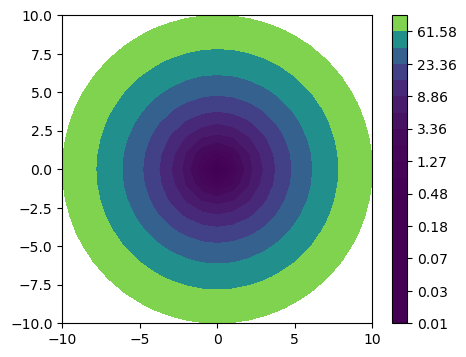

In [16]:
# Sphere function
step = 1
grid_sphere = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_sphere = func_sphere(grid_sphere)
fig_shpere, ax_shpere = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_shpere = ax_shpere.contourf(grid_sphere[0], grid_sphere[1], fv_sphere, levels=np.logspace(-2, 2, 20))
fig_shpere.colorbar(contour_shpere, ax=ax_shpere)

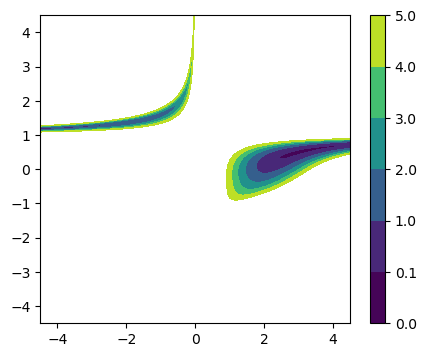

In [17]:
# Beale function
step = .01
grid_beale = np.meshgrid(np.arange(-4.5, 4.5+step, step), np.arange(-4.5, 4.5+step, step))
fv_beale = func_beale(grid_beale)
fig_beale, ax_beale = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_beale = ax_beale.contourf(grid_beale[0], grid_beale[1], fv_beale, levels=[0, 0.1, 1, 2, 3, 4, 5])
fig_beale.colorbar(contour_beale, ax=ax_beale)

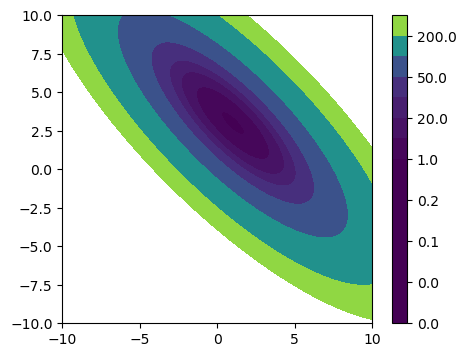

In [18]:
# Booth function
step = .01
grid_booth = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_booth = func_booth(grid_booth)
fig_booth, ax_booth = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_booth = ax_booth.contourf(grid_booth[0], grid_booth[1], fv_booth, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10, 20, 30, 50, 100, 200, 300])
fig_booth.colorbar(contour_booth, ax=ax_booth)

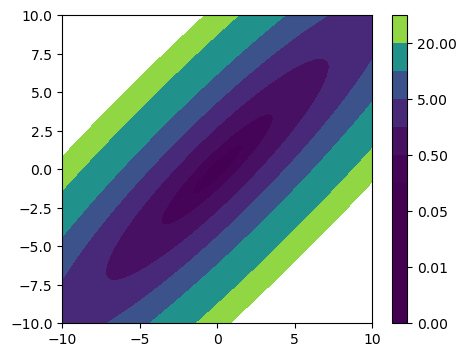

In [19]:
# Matyas function
step = .01
grid_matyas = np.meshgrid(np.arange(-10, 10+step, step), np.arange(-10, 10+step, step))
fv_matyas = func_matyas(grid_matyas)
fig_matyas, ax_matyas = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_matyas = ax_matyas.contourf(grid_matyas[0], grid_matyas[1], fv_matyas, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 20, 30])
fig_matyas.colorbar(contour_matyas, ax=ax_matyas)

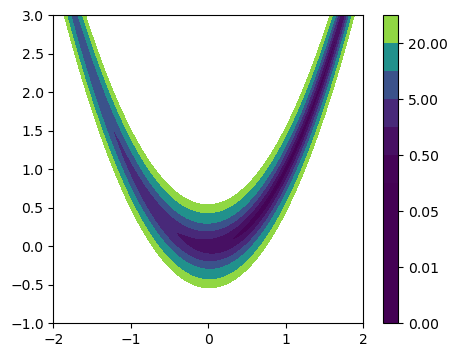

In [20]:
# Rosenbrock function
step = .01
grid_rosenbrock = np.meshgrid(np.arange(-2, 2+step, step), np.arange(-1, 3+step, step))
fv_rosenbrock = func_rosenbrock(grid_rosenbrock)
fig_rosenbrock, ax_rosenbrock = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
contour_rosenbrock = ax_rosenbrock.contourf(grid_rosenbrock[0], grid_rosenbrock[1], fv_rosenbrock, levels=[0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 2, 5, 10, 20, 30])
fig_rosenbrock.colorbar(contour_rosenbrock, ax=ax_rosenbrock)

### 3-3. Final Code (함수화하여 수행)

In [21]:
######################### Central Difference Method로 함수의 근사 gradient 계산하는 함수
def grad_centraldiff(func, x):
    dim_x = x.shape[0]
    dfdx = np.empty([dim_x, 1])
    h = 1e-6
    for i in np.arange(dim_x):
        dx = np.zeros([dim_x, 1]); dx[i] = 1
        dfdx[i] = (func(x + h*dx) - func(x - h*dx))/(2*h)
    return dfdx

In [ ]:
######################### Conjugate Gradient Method - Hestenes Stiefel Formula supplemented by Steepest Descent Method for numerical stability
def cg_nl_hs(k, grad_old, grad_cur, p_old):
    if k == 0:
        p = -grad_cur
    else:
        num = (grad_cur - grad_old).T@grad_cur
        den = (grad_cur - grad_old).T@p_old
        if abs(den) < 1e-12 or np.isnan(den) or np.isnan(num): # 분모(den)가 0에 가까워지면 beta, p, x_new가 차례로 폭주하는 걸 방지하기 위해 이 경우 steepest descent method를 대신 사용.
            p = -grad_cur
        else:
            beta = num/den
            p = -grad_cur + beta*p_old
    return p

In [23]:
######################### Backtracking 함수
# backtracking 알고리즘, 더 포괄적으로 step size alpha를 찾는 line search algorithm은 반드시 함수가 명시적으로 주어져야 한다.
# alpha를 찾기 위해서는 every alpha_try에서 function evaluation을 거쳐야 하기 때문이다.
def backtracking(func, x, grad_x, p, k):
    c1 = 1e-4
    c2 = 0.5

    alpha_try = 1
    x_try = x + alpha_try*p

    i = 0
    while func(x_try) > (func(x) + c1*alpha_try*grad_x.T@p):
        i = i + 1
        alpha_try = c2*alpha_try
        x_try = x + alpha_try*p
    alpha = alpha_try
    print(f'alpha_{k}_{i} = {alpha}\n')
    return alpha

In [24]:
#################################### Define optimization problem  ####################################
obj = func_rosenbrock

#################################### Tolerance setting ####################################
tol = 1e-7

#################################### Initial guess ####################################
x_cur = np.array([[0], 
                  [3]]) # 2 x 1 matrix(※ matlab과 다른 점. numpyp는 vector를 1차원 array, matrix를 2차원 array로 엄밀하게 구분해서 다룬다.)
                      # 따라서 웬만하면 그냥 vector도 matrix form으로 쓰는 걸 추천. 나중에 matrix와 vector를 함께 계산할 일이 많기 때문.
dim_x = x_cur.shape[0] # design space dimension

print(f'x0 : {x_cur.reshape(dim_x)}') # 이렇게 메시지 출력할 때만 vector form으로 쓰자(메시지는 알아보기 쉬워야 하니까).
grad_cur = grad_centraldiff(obj, x_cur) # gradient of x0
p_cur = -grad_cur # Search direction Initializion for 1st line search(to be used as p_old)
k = 0 # Iteration initialization

#################################### NC for optimality check of initial guess ####################################
if np.linalg.norm(grad_cur) < tol:
    print(f'norm of grad at x0 : {np.linalg.norm(grad_cur)} --> x0 is optimum point !')
else:
    print(f'norm of grad at x0 : {np.linalg.norm(grad_cur)} --> x0 is not optimum point. Optimization begins ...')

    #################################### Line search ####################################
    x_new = x_cur # Iteration loop 위해 이름 변경
    grad_new = grad_cur # Iteration loop 위해 이름 변경
    while np.linalg.norm(grad_new) > tol: #### Convergence Check ####
        #################################### Search direction p_cur ####################################
        x_old = x_cur
        grad_old = grad_cur
        p_old = p_cur

        x_cur = x_new
        grad_cur = grad_new

        p_cur = cg_nl_hs(k, grad_old, grad_cur, p_old)
        print(f'p_{k} = {p_cur.reshape(dim_x)}')

        #################################### Step length alpha ####################################
        alpha = backtracking(obj, x_cur, grad_cur, p_cur, k) #### backtracking algorithm ####

        # New point x_new
        x_new = x_cur + alpha*p_cur
        grad_new = grad_centraldiff(obj, x_new)
        k = k + 1
        print(f'x_{k} = {x_new.reshape(dim_x)} / |grad(x_{k})| = {np.linalg.norm(grad_new)}')

#################################### Complete Optimization ####################################
print(f'optimization converges --> x* = {x_new.reshape(dim_x)} / |grad(x*)| = {np.linalg.norm(grad_new)}')


x0 : [0 3]
norm of grad at x0 : 600.0033334008182 --> x0 is not optimum point. Optimization begins ...
p_0 = [   1.99999999 -600.00000008]
alpha_0_7 = 0.0078125

x_1 = [ 0.015625 -1.6875  ] / |grad(x_1)| = 337.6578472911628
p_1 = [-7.45420774 -0.08411606]
alpha_1_10 = 0.0009765625

x_2 = [ 0.0083455  -1.68758215] / |grad(x_2)| = 337.55009762971093
p_2 = [  1.26492323 337.58582497]
alpha_2_7 = 0.0078125

x_3 = [0.01822771 0.94980711] / |grad(x_3)| = 190.102777433649
p_3 = [9.59863193 0.22815506]
alpha_3_3 = 0.125

x_4 = [1.2180567  0.97832649] / |grad(x_4)| = 266.55085009363563
p_4 = [125.14222661 109.90438883]
alpha_4_60 = 8.673617379884035e-19

x_5 = [1.2180567  0.97832649] / |grad(x_5)| = 266.5508500952793
p_5 = [-2.84217094e-14  3.17681451e+02]
alpha_5_9 = 0.001953125

x_6 = [1.2180567  1.59879808] / |grad(x_6)| = 60.23593822400277
p_6 = [ 55.66072973 135.59584998]
alpha_6_7 = 0.0078125

x_7 = [1.65290615 2.65814066] / |grad(x_7)| = 52.337816071437935
p_7 = [ 377.51353133 1056.76035

### hybrid 기법(CG + SteepeseDescent)으로 발산(NaN 발생) 억제 성공.